https://github.com/aashutosh-raut/Carprediction

In [2]:
import mlflow
import numpy as np #importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report
from scipy import linalg
# If you need sparse matrix linalg, use:
# from scipy.sparse import linalg as sparse_linalg
import mlflow
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/") 
mlflow.set_experiment(experiment_name="st126438-A3")

<Experiment: artifact_location='mlflow-artifacts:/211260474760409452', creation_time=1759565122605, experiment_id='211260474760409452', last_update_time=1759565122605, lifecycle_stage='active', name='st126438-A3', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [4]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.1.3', '2.2.3', '0.13.2', '3.10.0')

In [5]:
df = pd.read_csv('Cars.csv') #importing/loading the data set

In [6]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
df.shape # Checking the number of data and columns

(8128, 13)

In [8]:
df.describe() # here we describe the data, see what the rows and columns have

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  

In [10]:
df.columns # here we see what are the columns (features we will later take to train test the model. some of them we will use some we will drop.) now we will rename the columns below. 

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [11]:
df.rename(columns = {'name': 'brand', 'year': 'year', 'selling_price': 'selling_price', 'km_driven': 'km_driven', 'fuel': 'fuel', 'seller_type': 'seller_type', 'transmission': 'transmission', 'owner': 'owner', 'mileage': 'mileage',  'engine': 'engine', 'max_power': 'max_power', 'torque': 'torque', 'seats': 'seats'}, inplace = True)
# The above is the renaming process of the Exploratory (EDA)

In [12]:
df.columns # checking the updated columns names

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [13]:
df['transmission'].unique() # checking the unique values in the transmission column

array(['Manual', 'Automatic'], dtype=object)

In [14]:
df['owner'].unique() # checking the data in the owner column

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [15]:
df['owner'] = df['owner'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}) # changing the string into numeric values

In [16]:
df['owner'].unique() # checking the updated data 

array([1, 2, 3, 4, 5])

In [17]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [18]:
df['fuel'].unique() # checking the data in the fuel column 

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [19]:
df = df[df['fuel'] != 'LPG']
df['fuel'] #droping LPG from the data

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8090, dtype: object

In [20]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [21]:
df = df[df['fuel'] != 'CNG']
df['fuel'] #dropping CNG from the data

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8033, dtype: object

In [22]:
df['fuel'].unique() # checking if LPG and CNG have been dropped from the data

array(['Diesel', 'Petrol'], dtype=object)

In [23]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '24.52 kmpl',
       '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl',
       '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl', '18.2 kmpl',
       '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl', '23.95 kmpl',
       '17.0 kmpl', '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl',
       '18.5 kmpl', '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl',
       '26.0 kmpl', '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl', '16.47 kmpl', '15.04 kmpl',
      

In [24]:
df['mileage'] = df['mileage'].str.split(' ').str[0]
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: object

In [25]:
df['mileage'].dtype

dtype('O')

In [26]:
df['mileage'] = df['mileage'].astype(float)
df['mileage'].dtype

dtype('float64')

In [27]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1061 CC', '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [28]:
df['engine'] = df['engine'].str.split(' ').str[0]
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8033, dtype: object

In [29]:
df['engine'] = df['engine'].astype(float)
df['engine'].dtype

dtype('float64')

In [30]:
df['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8033, dtype: object

In [31]:
df['max_power'] = df['max_power'].str.split(' ').str[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8033, dtype: object

In [32]:
df['max_power'] = df['max_power'].astype(float)
df['max_power'].dtype

dtype('float64')

In [33]:
df['brand']

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: brand, Length: 8033, dtype: object

In [34]:
df['brand'] = df['brand'].str.split(' ').str[0]
df['brand']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: brand, Length: 8033, dtype: object

In [35]:
df.drop(columns={'torque'}, inplace=True) #Dropping torque 

In [36]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [37]:
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [38]:
df['owner'].dtype

dtype('int64')

In [39]:
df = df[df['owner'] !=5] # Removing test drive cars
df['owner'].unique()

array([1, 2, 3, 4])

In [40]:
df['selling_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8028, dtype: int64

In [41]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [42]:
df.isna().sum()

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

In [43]:
for col in ['mileage', 'engine', 'max_power']:
    df[col].fillna(df[col].median(), inplace=True)

In [44]:
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

In [45]:
df.isna().sum()

brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

<Axes: xlabel='owner', ylabel='count'>

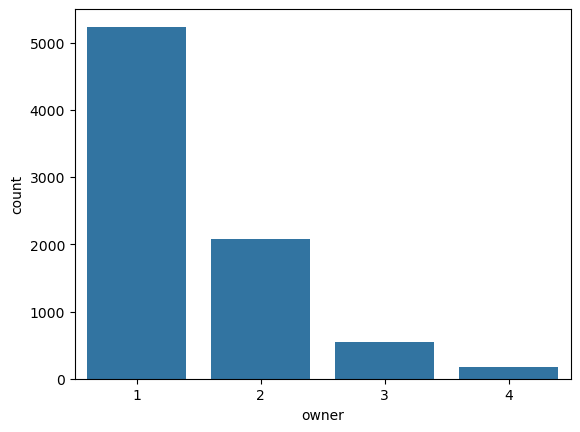

In [46]:
sns.countplot(data = df, x = 'owner') # Univariate analysis. Countplot.

<Axes: xlabel='fuel', ylabel='count'>

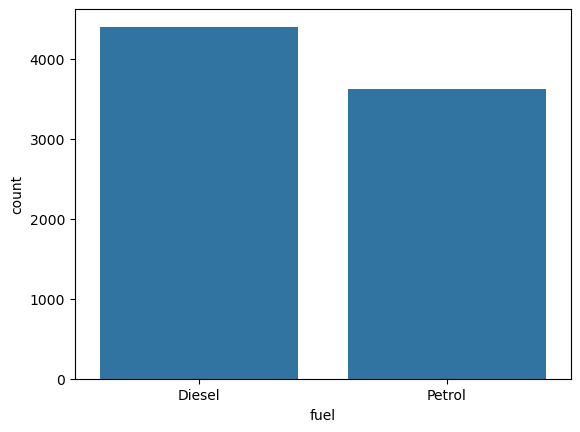

In [47]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

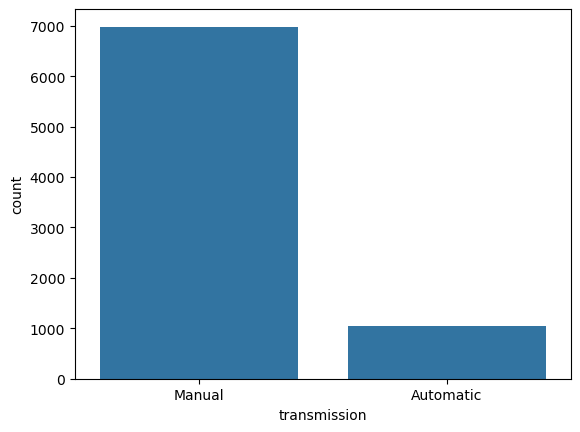

In [48]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='seats', ylabel='count'>

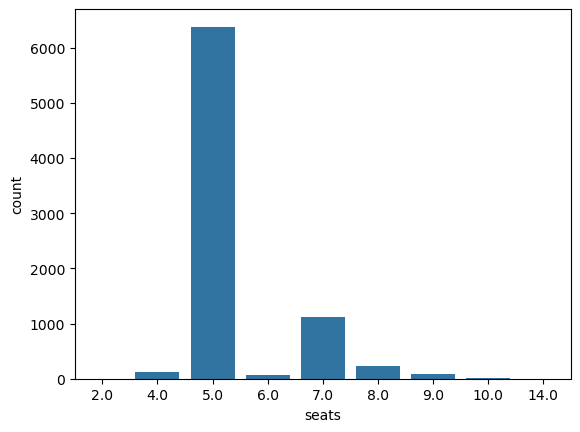

In [49]:
sns.countplot(data = df, x = 'seats')

Text(0.5, 0, 'engine')

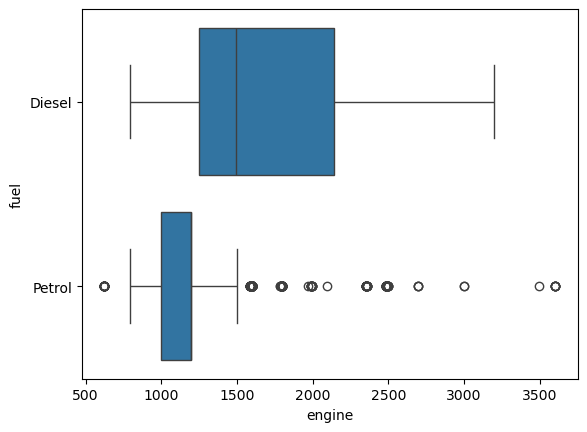

In [50]:
sns.boxplot(x = df["engine"], y = df["fuel"]); #Boxplot
plt.ylabel("fuel")
plt.xlabel("engine")

<Axes: xlabel='mileage', ylabel='engine'>

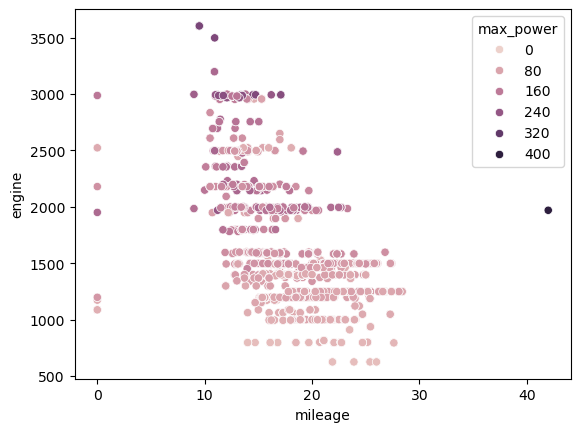

In [51]:

sns.scatterplot(x = df['mileage'], y = df['engine'], hue=df['max_power']) #scatterplot

<Axes: xlabel='mileage', ylabel='year'>

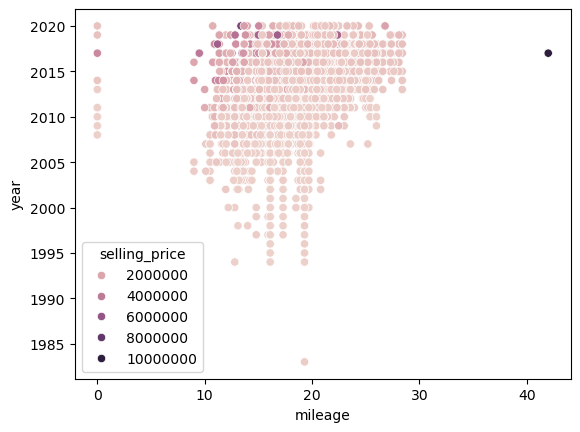

In [52]:

sns.scatterplot(x = df['mileage'], y = df['year'], hue=df['selling_price'])

In [53]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [54]:
print(df['fuel'].unique())
print(df['brand'].unique())
print(df['transmission'].unique())



['Diesel' 'Petrol']
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
['Manual' 'Automatic']


In [55]:
df.dtypes #checking datatypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [56]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to hold encoders
label_encoders = {}

categorical_cols = [
   'brand', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'
    ]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# le = LabelEncoder()
# df["fuel"] = le.fit_transform(df["fuel"])

# df["fuel"].unique()
 # 0 = diesel and 1 = petrol 
 # transforming object 

In [58]:
# df["km_driven"] = le.fit_transform(df["km_driven"])

# df["km_driven"].unique()

In [59]:
# df["mileage"] = le.fit_transform(df["mileage"])

# df["mileage"].unique()

In [60]:
# df["engine"] = le.fit_transform(df["engine"])

# df["engine"].unique()

In [61]:
# df["max_power"] = le.fit_transform(df["max_power"])

# df["max_power"].unique()

In [62]:
# df["seats"] = le.fit_transform(df["seats"])

# df["seats"].unique()

In [63]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df["seller_type"] = le.fit_transform(df["seller_type"])

# df["seller_type"].unique() #using fit transform to change object into 1, 0, 2 ie the individual, dealer and trademark dealer

In [64]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df["transmission"] = le.fit_transform(df["transmission"])

# df["transmission"].unique() 

In [65]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df["brand"] = le.fit_transform(df["brand"])

# df["brand"].unique() #assigning brand names of cars with numeric values

In [66]:

# le = LabelEncoder()
# df["year"] = le.fit_transform(df["year"])

# df["year"].unique() 

In [67]:
# df["owner"] = le.fit_transform(df["owner"])

# df["owner"].unique()

<Axes: >

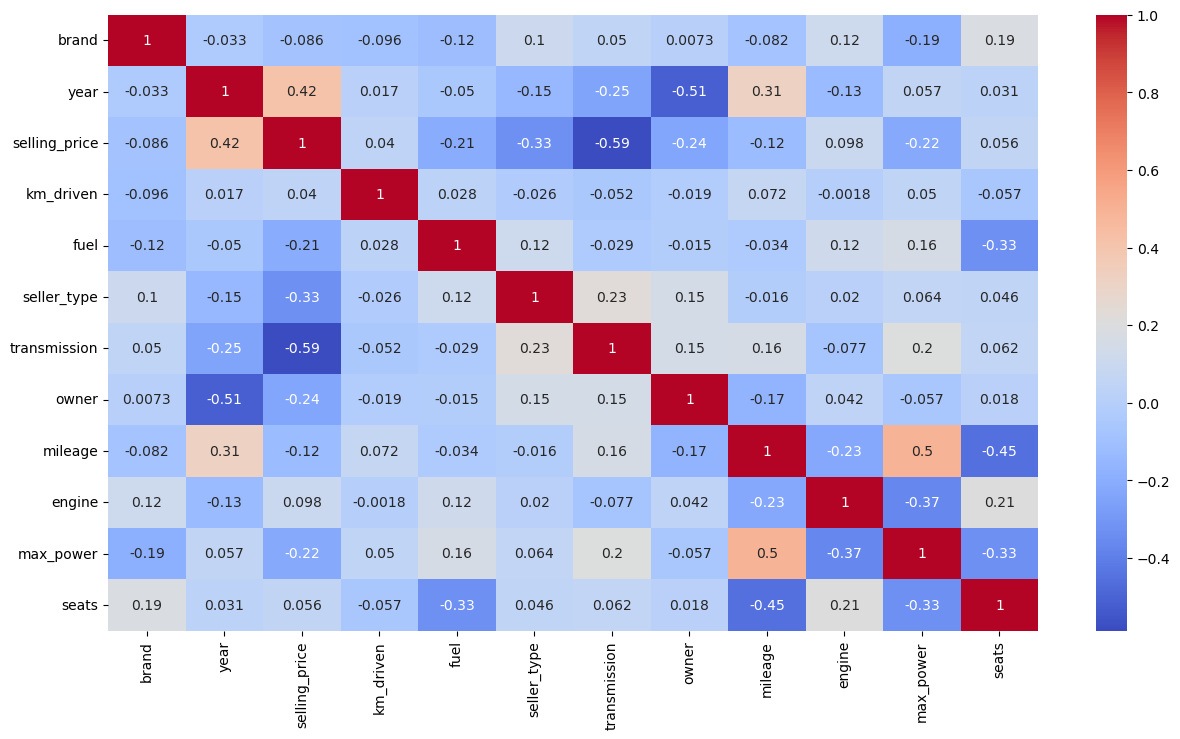

In [68]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") # plotting the corelation matrix 

In [69]:
# df = df.drop(columns=['owner'])
# df # dropping the columns year, transmission and owners brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',

<Axes: >

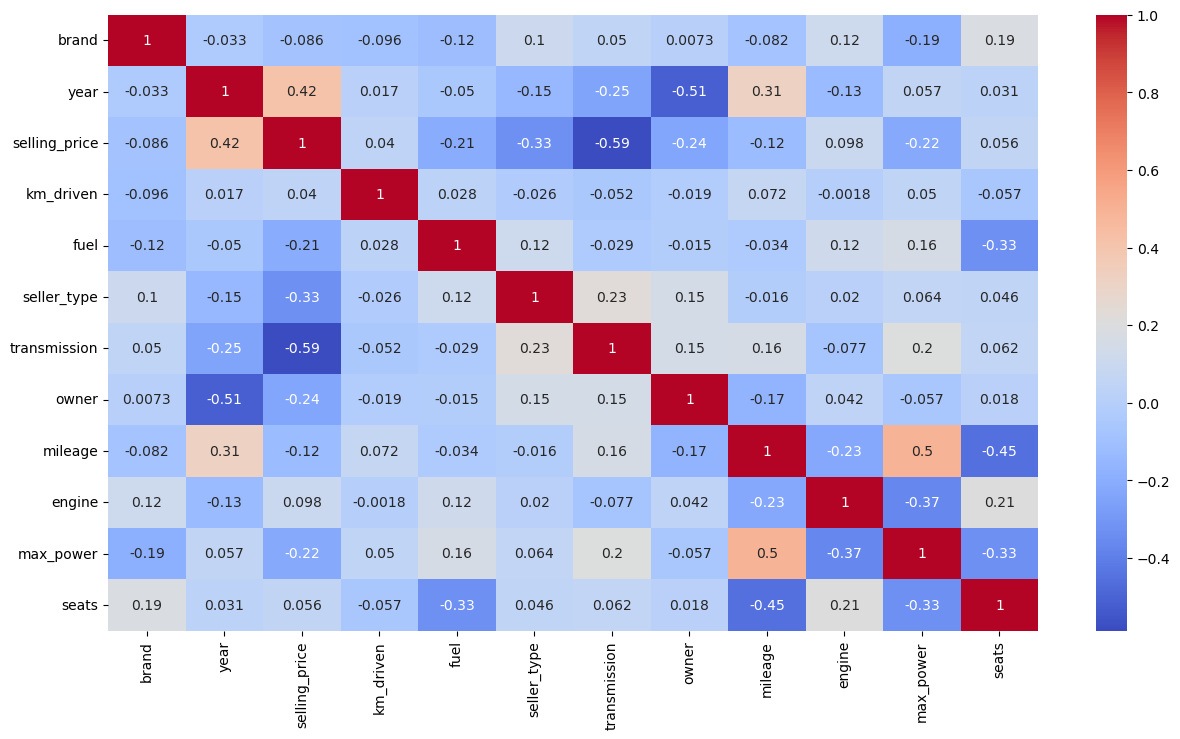

In [70]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") # corelation matrix of the features we will take for the model (x and y )

In [71]:
X = df[['brand', 'km_driven', 'fuel', 'seller_type', 'mileage', 'engine', 'max_power', 'year', 'seats', 'transmission', 'owner']] #features we will take to train and test the model
y = df['selling_price'] #feature engineering the data x are the features we use to get the y where y is the selling price of cars

In [72]:
y = pd.qcut(y, q=4, labels=[0,1,2,3])

In [73]:
y.value_counts()

selling_price
0    2050
1    2044
3    1991
2    1943
Name: count, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # Splitting the data into train set and test set

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5619, 11), (2409, 11), (5619,), (2409,))

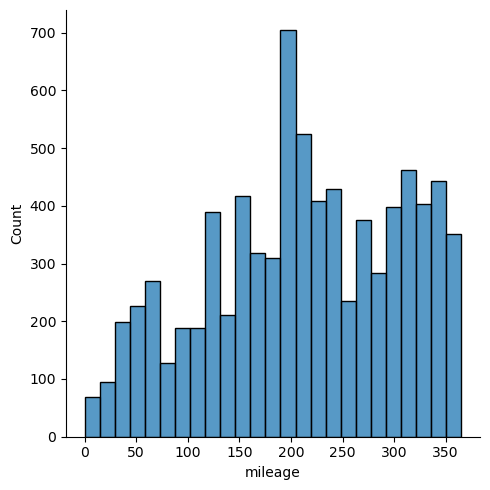

In [76]:
sns.displot(data=df, x='mileage') # plotting the data

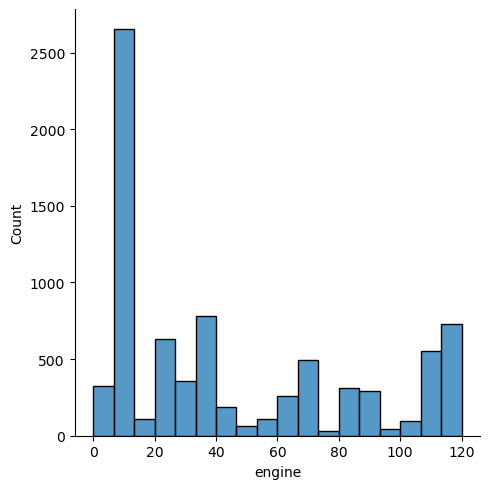

In [77]:
sns.displot(data=df, x='engine')

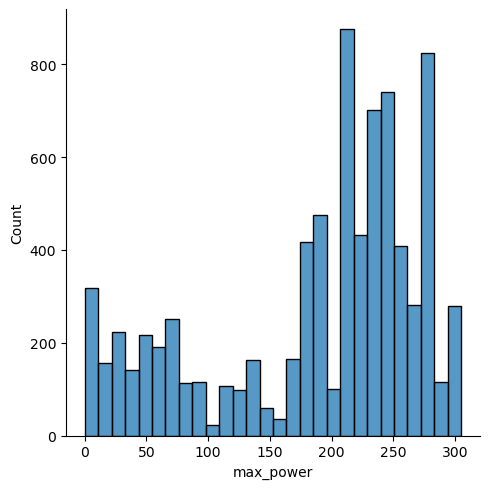

In [78]:
sns.displot(data=df, x='max_power')

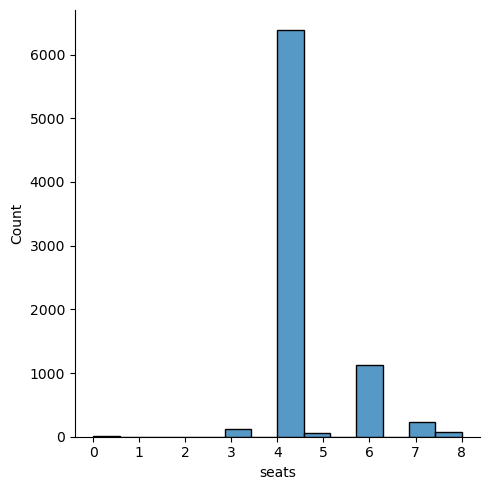

In [79]:
sns.displot(data=df, x='seats')

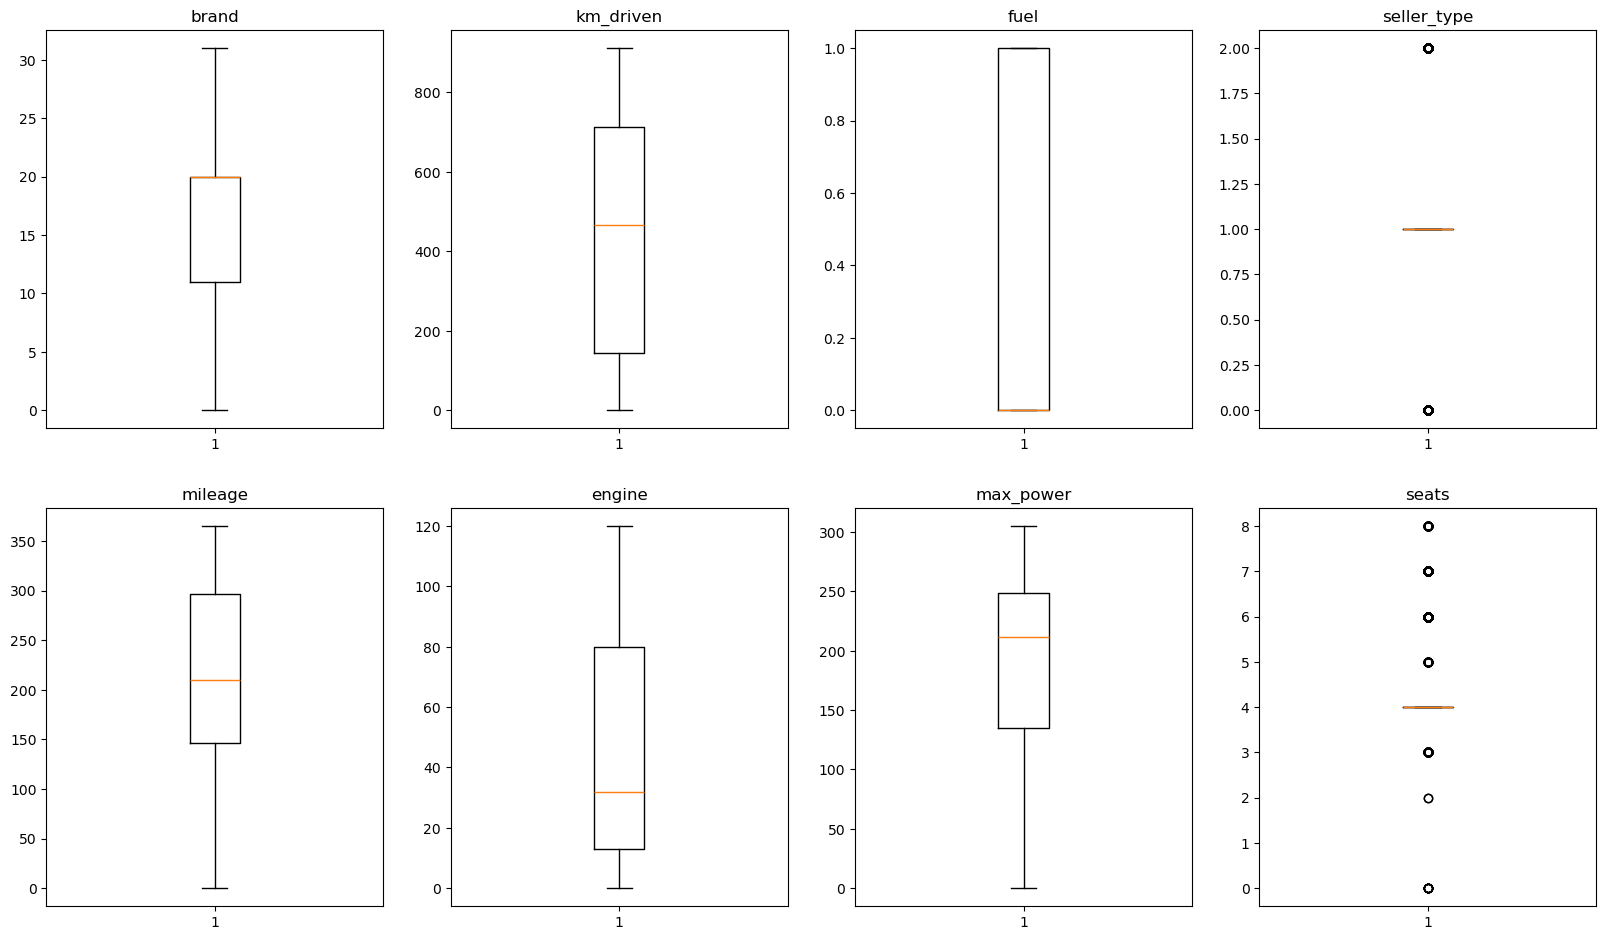

In [80]:
col_dict = {'brand':1,'km_driven':2, 'fuel':3, 'seller_type':4, 'mileage':5, 'engine':6, 'max_power':7, 'seats':8}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [81]:
def outlier_count(col, data = X_train):
    
    # calculating the 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate the inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # counting the number of outliers, which are the data that are less than min_val or more than max_val which was calculated above.
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculating the percentage of the outliers.
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [82]:
for col in X_train.columns: #lets check the percentage of outliers in each columns.
    outlier_count(col)


---------------seller_type---------------

Number of outliers: 944
Percent of data that is outlier: 16.8%

---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------seats---------------

Number of outliers: 1158
Percent of data that is outlier: 20.61%

---------------transmission---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%

---------------owner---------------

Number of outliers: 110
Percent of data that is outlier: 1.96%


In [83]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# #bias
# X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
# X_test  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# # Converting to NumPy arrays 
# X_train = X_train if isinstance(X_train, np.ndarray) else X_train.to_numpy()
# X_test = X_test if isinstance(X_test, np.ndarray) else X_test.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

# scaler_y = StandardScaler()
# y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()


In [84]:

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# one hot encoding y_train
k = len(np.unique(y))
y_train_encoded = np.zeros((y_train.shape[0], k))
y_train_encoded[np.arange(y_train.shape[0]), y_train.astype(int)] = 1

In [85]:
y_train_encoded

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [86]:
# from sklearn.preprocessing import StandardScaler

# # feature scaling the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)

In [87]:
# from sklearn.preprocessing import MinMaxScaler

# # Scale X
# scaler_X = MinMaxScaler()
# X_train = scaler_X.fit_transform(X_train)
# X_test  = scaler_X.transform(X_test)

# # Scale y
# scaler_y = MinMaxScaler()
# y_train = scaler_y.fit_transform(y_train.to_numpy().reshape(-1,1)).flatten()
# y_test  = scaler_y.transform(y_test.to_numpy().reshape(-1,1)).flatten()

In [88]:
y

0       1
1       1
2       0
3       0
4       0
       ..
8123    1
8124    0
8125    1
8126    1
8127    1
Name: selling_price, Length: 8028, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [89]:
# from sklearn.linear_model import LinearRegression  #calculating the MSE and r2 using the linear regression model
# from sklearn.metrics import mean_squared_error, r2_score

# lr = LinearRegression()
# lr.fit(x_train, y_train)
# yhat = lr.predict(x_test)

# print("MSE: ", mean_squared_error(y_test, yhat))
# print("r2: ", r2_score(y_test, yhat))

In [90]:
#!pip install mlflow

In [91]:
y_train

array([1, 1, 2, ..., 3, 3, 3])

## Logistic Regression

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import time

class LogisticRegression:
    def __init__(self, k, n, lr=0.001, max_iter=1000, l2_penalty=False, lambda_=0.01, momentum=0.9):
        self.k = k          # number of classes
        self.n = n          # number of features
        self.lr = lr
        self.max_iter = max_iter
        self.l2_penalty = l2_penalty
        self.lambda_ = lambda_
        self.momentum = momentum

    def _xavier_init(self):
        limit = np.sqrt(6 / (self.n + self.k))
        W = np.random.uniform(-limit, limit, size=(self.n, self.k))
        b = np.zeros((1, self.k))
        return W, b

    def softmax(self, Z):
        Z = np.array(Z, dtype=float)
        Z = Z - np.max(Z, axis=1, keepdims=True)  # stability trick
        expZ = np.exp(Z)
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    def _predict(self, X):
        return self.softmax(np.dot(X, self.W) + self.b)

    def predict(self, X_test):
        return np.argmax(self._predict(X_test), axis=1)

    def gradient(self, X, Y):
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)
        m = X.shape[0]

        H = self._predict(X)
        loss = -np.sum(Y * np.log(H + 1e-9)) / m

        grad_W = np.dot(X.T, (H - Y)) / m
        grad_b = np.sum(H - Y, axis=0, keepdims=True) / m

        if self.l2_penalty:
            grad_W += (self.lambda_ / m) * self.W
            loss += (self.lambda_ / (2*m)) * np.sum(self.W**2)

        return loss, grad_W, grad_b

    def fit(self, X, Y):
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)

        # Xavier initialization
        self.W, self.b = self._xavier_init()
        self.losses = []

        # Initialize velocities
        vW = np.zeros_like(self.W)
        vb = np.zeros_like(self.b)

        start_time = time.time()
        for i in range(self.max_iter):
            # Full batch gradient descent
            loss, grad_W, grad_b = self.gradient(X, Y)

            # Momentum update
            vW = self.momentum * vW - self.lr * grad_W
            vb = self.momentum * vb - self.lr * grad_b

            self.W += vW
            self.b += vb

            if i % 100 == 0:
                self.losses.append(loss)
                print(f"Loss at iteration {i}: {loss}")

        print(f"Time taken: {time.time() - start_time:.2f} seconds")

    def plot(self):
        plt.figure(figsize=(8,5))
        plt.plot(np.arange(len(self.losses))*100, self.losses, label="Train losses")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.title("Training Loss over Iterations")
        plt.legend()
        plt.show()

In [93]:
X_train = X_train.astype(float)
X_test  = X_test.astype(float)

In [94]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [95]:
# Standardize features
X_mean = X_train.mean(axis=0)
X_std  = X_train.std(axis=0)
X_train_std = (X_train - X_mean) / X_std
X_test_std  = (X_test - X_mean) / X_std


Loss at iteration 0: 1.7202297157200797
Loss at iteration 100: 0.9325625692796592
Loss at iteration 200: 0.8620289156895086
Loss at iteration 300: 0.8327158897109129
Loss at iteration 400: 0.816596205381128
Loss at iteration 500: 0.8066165328951169
Loss at iteration 600: 0.7999692957198469
Loss at iteration 700: 0.795310846029122
Loss at iteration 800: 0.7919230788557184
Loss at iteration 900: 0.7893901375886633
Time taken: 1.65 seconds


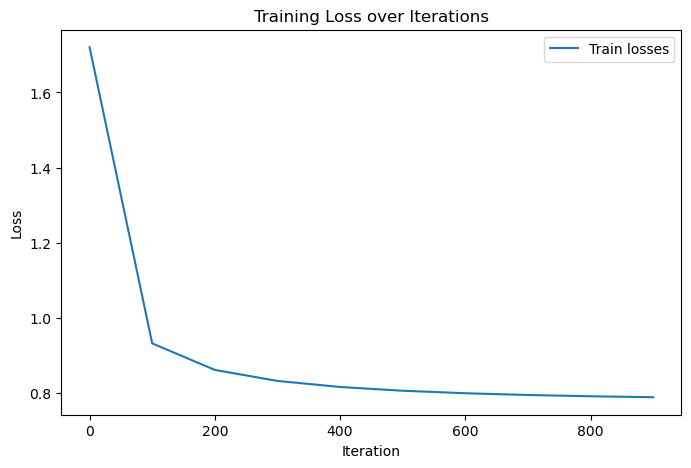

In [96]:
model = LogisticRegression(k=k, n=X_train_std.shape[1], lr=0.01, max_iter=1000, l2_penalty=True, lambda_=0.1) #initializing the model
model.fit(X_train_std, y_train_encoded) #fitting the model
model.plot() #plotting the losses

In [97]:
yhat = model.predict(X_test_std) # predicting the values using the test set

In [98]:
yhat

array([0, 3, 1, ..., 0, 2, 1])

In [99]:
X_test[0]

array([ 28., 428.,   1.,   1.,  98.,  20., 281.,  18.,   4.,   1.,   0.])

In [100]:
X.iloc[0]

brand            20
km_driven       131
fuel              0
seller_type       1
mileage         318
engine           13
max_power       231
year             21
seats             4
transmission      1
owner             0
Name: 0, dtype: int64

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat)) # printing the classification report

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       633
           1       0.58      0.57      0.58       627
           2       0.53      0.53      0.53       561
           3       0.72      0.74      0.73       588

    accuracy                           0.66      2409
   macro avg       0.65      0.66      0.65      2409
weighted avg       0.66      0.66      0.66      2409



In [102]:
import numpy as np

# ---------- helpers ----------
def _prep_labels(y_true, y_pred, labels=None):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    idx = {lbl: i for i, lbl in enumerate(labels)}
    return y_true, y_pred, labels, idx

def confusion_matrix(y_true, y_pred, labels=None):
    y_true, y_pred, labels, idx = _prep_labels(y_true, y_pred, labels)
    cm = np.zeros((len(labels), len(labels)), dtype=int)  # rows=true, cols=pred
    for t, p in zip(y_true, y_pred):
        cm[idx[t], idx[p]] += 1
    return cm, labels

def _tp_fp_fn_tn(cm):
    tp = np.diag(cm).astype(float)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (tp + fp + fn)
    return tp, fp, fn, tn

# ---------- metrics ----------
def accuracy(y_true, y_pred):
    """correct / all"""
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return (y_true == y_pred).mean()

def precision_recall_f1_per_class(y_true, y_pred, labels=None, zero_division=0.0):
    """
    For each class c:
      precision_c = TP_c / (TP_c + FP_c)
      recall_c    = TP_c / (TP_c + FN_c)
      f1_c        = 2 * precision_c * recall_c / (precision_c + recall_c)
    """
    cm, labels = confusion_matrix(y_true, y_pred, labels)
    tp, fp, fn, _ = _tp_fp_fn_tn(cm)

    with np.errstate(divide='ignore', invalid='ignore'):
        prec = np.divide(tp, tp + fp,
                         out=np.full_like(tp, zero_division, dtype=float),
                         where=(tp + fp) != 0)
        rec  = np.divide(tp, tp + fn,
                         out=np.full_like(tp, zero_division, dtype=float),
                         where=(tp + fn) != 0)
        f1   = np.divide(2 * prec * rec, (prec + rec),
                         out=np.zeros_like(tp, dtype=float),
                         where=(prec + rec) != 0)

    support = cm.sum(axis=1)
    return {"labels": labels, "precision": prec, "recall": rec, "f1": f1,
            "support": support, "cm": cm}

def classification_report_scratch(y_true, y_pred, labels=None, zero_division=0.0, digits=2):
    """Text report similar to sklearn's classification_report."""
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    labels = res["labels"]; p = res["precision"]; r = res["recall"]; f1 = res["f1"]; s = res["support"]
    total = s.sum()
    acc = accuracy(y_true, y_pred)

    macro = np.array([p.mean(), r.mean(), f1.mean()])
    weighted = np.array([(p*s).sum()/total, (r*s).sum()/total, (f1*s).sum()/total])

    lines = [f"{'class':>12} {'precision':>10} {'recall':>10} {'f1-score':>10} {'support':>10}"]
    for lbl, pi, ri, fi, si in zip(labels, p, r, f1, s):
        lines.append(f"{str(lbl):>12} {pi:10.{digits}f} {ri:10.{digits}f} {fi:10.{digits}f} {int(si):10d}")
    lines.append(f"{'accuracy':>12} {'':>10} {'':>10} {acc:10.{digits}f} {int(total):10d}")
    lines.append(f"{'macro avg':>12} {macro[0]:10.{digits}f} {macro[1]:10.{digits}f} {macro[2]:10.{digits}f} {int(total):10d}")
    lines.append(f"{'weighted avg':>12} {weighted[0]:10.{digits}f} {weighted[1]:10.{digits}f} {weighted[2]:10.{digits}f} {int(total):10d}")
    return "\n".join(lines)
print(classification_report_scratch(y_test, yhat)) # printing the classification report using scratch code

       class  precision     recall   f1-score    support
           0       0.80       0.78       0.79        633
           1       0.58       0.57       0.58        627
           2       0.53       0.53       0.53        561
           3       0.72       0.74       0.73        588
    accuracy                             0.66       2409
   macro avg       0.65       0.66       0.65       2409
weighted avg       0.66       0.66       0.66       2409


In [103]:
import numpy as np

# ---- scratch confusion matrix (renamed) ----
def confusion_matrix_scratch(y_true, y_pred, labels=None):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    idx = {lbl: i for i, lbl in enumerate(labels)}
    cm = np.zeros((len(labels), len(labels)), dtype=int)  # rows=true, cols=pred
    for t, p in zip(y_true, y_pred):
        cm[idx[t], idx[p]] += 1
    return cm, labels

def _tp_fp_fn_tn(cm):
    tp = np.diag(cm).astype(float)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (tp + fp + fn)
    return tp, fp, fn, tn

def accuracy(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return (y_true == y_pred).mean()

def precision_recall_f1_per_class(y_true, y_pred, labels=None, zero_division=0.0):
    # *** call our scratch CM, not sklearn's ***
    cm, labels = confusion_matrix_scratch(y_true, y_pred, labels)
    tp, fp, fn, _ = _tp_fp_fn_tn(cm)

    with np.errstate(divide='ignore', invalid='ignore'):
        prec = np.divide(tp, tp + fp,
                         out=np.full_like(tp, zero_division, dtype=float),
                         where=(tp + fp) != 0)
        rec  = np.divide(tp, tp + fn,
                         out=np.full_like(tp, zero_division, dtype=float),
                         where=(tp + fn) != 0)
        f1   = np.divide(2 * prec * rec, (prec + rec),
                         out=np.zeros_like(tp, dtype=float),
                         where=(prec + rec) != 0)
    support = cm.sum(axis=1)
    return {"labels": labels, "precision": prec, "recall": rec, "f1": f1,
            "support": support, "cm": cm}

def classification_report_scratch(y_true, y_pred, labels=None, zero_division=0.0, digits=2):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    labels = res["labels"]; p = res["precision"]; r = res["recall"]; f1 = res["f1"]; s = res["support"]
    total = s.sum()
    acc = accuracy(y_true, y_pred)

    macro = np.array([p.mean(), r.mean(), f1.mean()])
    w = s / total if total > 0 else np.zeros_like(s, float)
    weighted = np.array([(p*w).sum(), (r*w).sum(), (f1*w).sum()])

    lines = [f"{'class':>12} {'precision':>10} {'recall':>10} {'f1-score':>10} {'support':>10}"]
    for lbl, pi, ri, fi, si in zip(labels, p, r, f1, s):
        lines.append(f"{str(lbl):>12} {pi:10.{digits}f} {ri:10.{digits}f} {fi:10.{digits}f} {int(si):10d}")
    lines.append(f"{'accuracy':>12} {'':>10} {'':>10} {acc:10.{digits}f} {int(total):10d}")
    # lines.append(f"{'macro avg':>12} {macro[0]:10.{digits}f} {macro[1]:10.{digits}f} {macro[2]:10.{digits}f} {int(total):10d}")
    # lines.append(f"{'weighted avg':>12} {weighted[0]:10.{digits}f} {weighted[1]:10.{digits}f} {weighted[2]:10.{digits}f} {int(total):10d}")
    lines.append(f"{'macro avg':>12} {macro[0]:10.{digits}f} {macro[1]:10.{digits}f} {macro[2]:10.{digits}f} {int(total):10d}")
    lines.append(f"{'weighted avg':>12} {weighted[0]:10.{digits}f} {weighted[1]:10.{digits}f} {weighted[2]:10.{digits}f} {int(total):10d}")

    return "\n".join(lines)


In [104]:
import numpy as np

def macro_precision(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    return float(np.mean(res["precision"]))

def macro_recall(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    return float(np.mean(res["recall"]))

def macro_f1(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    return float(np.mean(res["f1"]))

def weighted_precision(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    s = res["support"].astype(float)
    w = s / s.sum() if s.sum() > 0 else np.zeros_like(s, dtype=float)
    return float(np.sum(res["precision"] * w))

def weighted_recall(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    s = res["support"].astype(float)
    w = s / s.sum() if s.sum() > 0 else np.zeros_like(s, dtype=float)
    return float(np.sum(res["recall"] * w))

def weighted_f1(y_true, y_pred, labels=None, zero_division=0.0):
    res = precision_recall_f1_per_class(y_true, y_pred, labels, zero_division)
    s = res["support"].astype(float)
    w = s / s.sum() if s.sum() > 0 else np.zeros_like(s, dtype=float)
    return float(np.sum(res["f1"] * w))
print("Macro Precision:", macro_precision(y_test, yhat))
print("Macro Recall:", macro_recall(y_test, yhat))
print("Macro F1:", macro_f1(y_test, yhat))
print("Weighted Precision:", weighted_precision(y_test, yhat))
print("Weighted Recall:", weighted_recall(y_test, yhat))
print("Weighted F1:", weighted_f1(y_test, yhat))    

Macro Precision: 0.6546800096914317
Macro Recall: 0.6551878160729359
Macro F1: 0.654825094630822
Weighted Precision: 0.6575254749761684
Weighted Recall: 0.6575342465753424
Weighted F1: 0.6574210180086212


In [105]:
from sklearn.metrics import (
    classification_report as sk_classification_report,
    precision_recall_fscore_support,
    accuracy_score,
    confusion_matrix as sk_confusion_matrix,  # alias to avoid shadowing
)

# Labels (handle one-hot if needed)
def to_labels(y):
    y = np.asarray(y)
    return y.argmax(1) if y.ndim == 2 else y.ravel().astype(int)

y_true = to_labels(y_test)
y_pred = to_labels(model.predict(X_test_std))  # use standardized test data

labels = np.unique(np.r_[y_true, y_pred])

print("scikit-learn")
print(sk_classification_report(y_true, y_pred, labels=labels, digits=4, zero_division=0))

print("\n From scratch")
print(classification_report_scratch(y_true, y_pred, labels=labels, zero_division=0, digits=4))

print("\nThe results match")

scikit-learn
              precision    recall  f1-score   support

           0     0.7961    0.7773    0.7866       633
           1     0.5793    0.5710    0.5751       627
           2     0.5276    0.5276    0.5276       561
           3     0.7157    0.7449    0.7300       588

    accuracy                         0.6575      2409
   macro avg     0.6547    0.6552    0.6548      2409
weighted avg     0.6575    0.6575    0.6574      2409


 From scratch
       class  precision     recall   f1-score    support
           0     0.7961     0.7773     0.7866        633
           1     0.5793     0.5710     0.5751        627
           2     0.5276     0.5276     0.5276        561
           3     0.7157     0.7449     0.7300        588
    accuracy                           0.6575       2409
   macro avg     0.6547     0.6552     0.6548       2409
weighted avg     0.6575     0.6575     0.6574       2409

The results match


In [106]:
class CarPricePredictor:
    def __init__(self, model, label_encoders, mean, std):
        self.model = model
        self.label_encoders = label_encoders
        self.mean = mean
        self.std = std
    
    def preprocess(self, X_raw):
        X = X_raw.copy()
        # Label encode categorical columns
        for col, le in self.label_encoders.items():
            if col in X:
                X[col] = le.transform([X[col]])[0] if isinstance(X, pd.Series) else le.transform(X[col])
        # Convert to numpy array
        if isinstance(X, pd.Series):
            X = X.to_numpy().reshape(1, -1)
        # Standardize
        X_std = (X - self.mean) / self.std
        return X_std
    
    def predict(self, X_raw):
        X_processed = self.preprocess(X_raw)
        return np.argmax(self.model._predict(X_processed), axis=1)

In [107]:
class CarPriceWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self, predictor):
        self.predictor = predictor

    def predict(self, context, model_input):
        # Make sure it works with DataFrames or Series
        return self.predictor.predict(model_input)

c:\Users\aashu\anaconda3\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [108]:
# acc = accuracy(y_test, yhat)
# macro_p = macro_precision(y_test, yhat)
# macro_r = macro_recall(y_test, yhat)
# macro_f = macro_f1(y_test, yhat)

In [109]:
acc = accuracy(y_test, yhat)
macro_p = macro_precision(y_test, yhat)
macro_r = macro_recall(y_test, yhat)
macro_f = macro_f1(y_test, yhat)
print(f"Accuracy: {acc}, Macro Precision: {macro_p}, Macro Recall: {macro_r}, Macro F1: {macro_f}")

Accuracy: 0.6575342465753424, Macro Precision: 0.6546800096914317, Macro Recall: 0.6551878160729359, Macro F1: 0.654825094630822


support = number of true samples of each class in y (the class count in the test set.)

In [110]:
import pandas as pd

sample_df = pd.DataFrame([{
    'brand': 20,
    'km_driven': 772,
    'fuel': '0',
    'seller_type': '1',
    'mileage': 25.4,
    'engine': 1200.0,
    'max_power': 84.0,
    'year': 21,
    'seats': 2.0,
    'transmission': '1',
    'owner': 1,
}])
# brand            20
# km_driven       772
# fuel              0
# seller_type       1
# mileage         320
# engine           24
# max_power        65
# year             21
# seats             2
# transmission      1
# owner             0

In [111]:
# # Create a dictionary of label encoders for categorical columns
# label_encoders = {
#     "fuel": le,
#     "seller_type": le,
#     "km_driven": le,
#     "mileage": le,
#     "engine": le,
#     "max_power": le,
#     "seats": le,
#     "transmission": le,
#     "brand": le,
#     "year": le,
#     "owner": le
# }

In [112]:
# Predicted Car Price

# Ensure categorical columns are integers, not strings
for col in ['fuel', 'seller_type', 'transmission']:
	if col in sample_df:
		sample_df[col] = sample_df[col].astype(int)

predictor = CarPricePredictor(model, {}, X_mean, X_std)
prediction = predictor.predict(sample_df)
print("Predicted price class:", prediction)

Predicted price class: [0]


In [113]:
# The car belongs to class 0.

In [114]:
import joblib
import os

local_path = "model/st126438-a3-model.pkl"
os.makedirs(os.path.dirname(local_path), exist_ok=True)

predictor = CarPricePredictor(
    model=model,       # trained logistic regression
    label_encoders={}, # pass empty dict if not using label encoders
    mean=X_mean,
    std=X_std
)
joblib.dump(predictor, local_path)

['model/st126438-a3-model.pkl']

In [ ]:
import joblib
MODEL_URI = "model/st126438-a3-model.pkl"
loaded_model = joblib.load(MODEL_URI)
loaded_model.predict(sample_df)



'd:\\Ait\\Machine learning\\ML Classwork 1\\A3'

# Implementation

In [115]:
import pickle

predictor = CarPricePredictor(
    model=model,        # your trained logistic regression
    label_encoders={},
    mean=X_mean,
    std=X_std
)
local_path = "model/st126438-a3-model.pkl"

print(f"Model saved locally at {local_path}")
with mlflow.start_run(run_name="logistic_regression") as run:
    # Log parameters and metrics
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("max_iter", model.max_iter)
    mlflow.log_param("lr", model.lr)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("macro_precision", macro_p)
    mlflow.log_metric("macro_recall", macro_r)
    mlflow.log_metric("macro_f1", macro_f)

    # Log model
    mlflow.pyfunc.log_model(
        name="model",
        python_model=CarPriceWrapper(predictor),
        input_example=sample_df
    )

    # Construct proper model URI to register
    model_uri = f"runs:/{run.info.run_id}/model"
    with open(local_path, "wb") as f:
        pickle.dump(CarPriceWrapper(predictor), f)

# Register as a new version
registered_model = mlflow.register_model(
    model_uri=model_uri,
    name="st126438-A3-model"
)

print(f"Registered version: {registered_model.version}")



Model saved locally at app/model/st126438-a3-model.pkl


2025/10/04 19:50:58 INFO mlflow.pyfunc: Inferring model signature from input example


🏃 View run logistic_regression at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/211260474760409452/runs/a0fc89d077f34e76bcf4cd6a6b4caaf4
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/211260474760409452


KeyboardInterrupt: 

In [171]:
# Load from MLflow registry
model_uri = "models:/st126438-A3-model/latest"
loaded_model = mlflow.pyfunc.load_model(model_uri)

prediction = loaded_model.predict(sample_df)
print("Predicted price:", prediction)

Predicted price: [0]


In [172]:

# # trained model as a simple pyfunc (so it can be registered/deployed)
# class CarPriceModel(mlflow.pyfunc.PythonModel):
#     def __init__(self, W, b, X_mean, X_std):
#         self.W = W; self.b = b; self.X_mean = X_mean; self.X_std = np.where(X_std==0, 1e-8, X_std)

#     def predict(self, context, model_input: pd.DataFrame):
#         X = model_input.to_numpy()
#         X = (X - self.X_mean) / self.X_std
#         logits = X @ self.W + self.b
#         probs = np.exp(logits - logits.max(axis=1, keepdims=True))
#         probs /= probs.sum(axis=1, keepdims=True)
#         return probs.argmax(axis=1)

# pyfunc_model = CarPriceModel(model.W, model.b, X_mean, X_std)

# #  Log params/metrics/model to MLflow
# with mlflow.start_run(run_name="logreg_l2"):
#     mlflow.log_params({
#         "lr": model.lr, "max_iter": model.max_iter,
#         "l2_penalty": model.l2_penalty, "lambda_": model.lambda_, "momentum": model.momentum
#     })
#     # metrics from scratch or sklearn:
#     from sklearn.metrics import accuracy_score, f1_score
#     y_pred = pyfunc_model.predict(None, pd.DataFrame(X_test))  # X_test BEFORE manual standardization
#     mlflow.log_metrics({
#         "accuracy": float(accuracy_score(y_test, y_pred)),
#         "macro_f1": float(f1_score(y_test, y_pred, average="macro"))
#     })


#     # # Save & log the pyfunc model
#     # mlflow.pyfunc.log_model(
#     #     name="model",
#     #     python_model=pyfunc_model,
#     #     pip_requirements=["mlflow", "numpy", "pandas"]
#     # )


In [173]:
# import numpy as np
# # LogisticRegression is already defined in the notebook (CELL INDEX: 60)

# def test_accepts_expected_input():
#     k, n = 4, 10
#     clf = LogisticRegression(k=k, n=n, max_iter=1)  # quick init
#     X = np.zeros((5, n))
#     # fake one-hot Y for shape
#     Y = np.zeros((5, k)); Y[np.arange(5), 0] = 1
#     clf.fit(X, Y)
#     out = clf.predict(X)
#     assert out.shape == (5,)

# def test_output_label_range():
#     k, n = 4, 6
#     clf = LogisticRegression(k=k, n=n, max_iter=1)
#     X = np.random.randn(8, n)
#     Y = np.zeros((8, k)); Y[np.arange(8), np.random.randint(0,k,8)] = 1
#     clf.fit(X, Y)
#     yhat = clf.predict(X)
#     assert yhat.min() >= 0 and yhat.max() < k


In [174]:
# with mlflow.start_run(run_name="logistic_regression") as run:
#     # Log parameters and metrics
#     mlflow.log_param("model_type", "LogisticRegression")
#     mlflow.log_param("max_iter", model.max_iter)
#     mlflow.log_param("lr", model.lr)

#     mlflow.log_metric("accuracy", accuracy)
#     mlflow.log_metric("macro_precision", macro_precision)
#     mlflow.log_metric("macro_recall", macro_recall)
#     mlflow.log_metric("macro_f1", macro_f1)



In [175]:
# # Create a sample_df using the first row of X
# import pandas as pd

# sample_df = pd.DataFrame([dict(zip(X.columns, X.iloc[0]))])

# # Log model
# mlflow.pyfunc.log_model(
#         name="model",
#         python_model=model,
#         input_example=sample_df
#     )

# # Register as a new version
# registered_model = mlflow.register_model(
#     model_uri=model_uri,
#     name="st126438-a3-model"
# )

# print(f"Registered version: {registered_model.version}")